# NLP_P20_LXMEAT_VQA MODEL

* STEP 1. 다른 이미지 테스트해 보기
* STEP 2. GQA DATASET TEST
* STEP 3. 내가 선택한 이미지로 VQA/GQA 버전 비교해 보기

In [2]:
# 오늘 실습을 위한 작업디렉토리로 이동합니다.
!cd ~/aiffel/lxmert


from IPython.display import clear_output, Image, display
import PIL.Image
import io
import json
import torch
import numpy as np
from transformers import LxmertForQuestionAnswering, LxmertTokenizer
import wget
import pickle
import os, sys

# 추가해준 모듈을 임포트하기 위해 아래 경로를 path에 추가합니다. 
sys.path.append(os.getenv('HOME')+'/aiffel/lxmert')
from processing_image import Preprocess
from visualizing_image import SingleImageViz
from modeling_frcnn import GeneralizedRCNN
from utils import Config
import utils

In [3]:
# object definition
OBJ_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/objects_vocab.txt"
objids = utils.get_data(OBJ_URL)
print(len(objids))
print(objids[:30])


1600
['yolk', 'goal', 'bathroom', 'macaroni', 'umpire', 'toothpick', 'alarm clock', 'ceiling fan', 'photos', 'parrot', 'tail fin', 'birthday cake', 'calculator', 'catcher', 'toilet', 'batter', 'stop sign,stopsign', 'cone', 'microwave,microwave oven', 'skateboard ramp', 'tea', 'dugout', 'products', 'halter', 'kettle', 'kitchen', 'refrigerator,fridge', 'ostrich', 'bathtub', 'blinds']


In [4]:
# attribute definition
ATTR_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/attributes_vocab.txt"
attrids = utils.get_data(ATTR_URL)
print(len(attrids))
print(attrids[:30])

400
['gray,grey', 'multi colored,multi-colored,multicolored', 'double decker,double-decker', 'unmade', 'red', 'camouflage', 'blue', 'white', 'green', 'pink', 'yellow', 'black', 'ivory', 'throwing', 'orange', 'spiky', 'plaid', 'purple', 'soccer', 'brake', 'blonde', 'american', 'flat screen', 'brown', 'wooden', 'performing', 'pulled back', 'windshield', 'bald', 'chocolate']


In [5]:
# VQA answer definition
VQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/vqa/trainval_label2ans.json"
vqa_answers = utils.get_data(VQA_URL)
print(len(vqa_answers))
print(vqa_answers[:30])

3129
['', 'woods', 'trash can', 'hanging', 'wooden', 'cooking', 'china', 'kids', 'bike rack', 'on phone', 'music', 'travel', 'tulip', 'arrow', 'branch', 'chevron', 'mouth', 'on right', 'rice', 'plate', 'lots', 'nature', 'fruits', 'throwing frisbee', 'blonde', 'life jacket', 'ham', 'hay', 'hat', 'to get to other side']


In [6]:
# 위 이미지의 URL
URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/images/input.jpg"

frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")
image_preprocess = Preprocess(frcnn_cfg)

images, sizes, scales_yx = image_preprocess(URL)

%s not found in cache or force_download set to True, downloading to %s https://s3.amazonaws.com/models.huggingface.co/bert/unc-nlp/frcnn-vg-finetuned/config.yaml /home/aiffel-dj54/.cache/torch/transformers/tmpjfqkqgj1


Downloading:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

loading configuration file cache


In [7]:
print(images)
print(sizes)

tensor([[[[  37.0199,   32.2233,   25.0255,  ...,  -40.9723,  -31.3756,
            -24.9801],
          [  31.0199,   27.6623,   22.6238,  ...,  -42.1717,  -31.8553,
            -24.9801],
          [  22.0199,   20.8207,   19.0213,  ...,  -43.9708,  -32.5748,
            -24.9801],
          ...,
          [ -85.9802,  -83.9816,  -80.9824,  ...,   71.0138,   63.8164,
             59.0198],
          [ -87.7801,  -85.0620,  -80.9833,  ...,   66.2157,   61.1775,
             57.8199],
          [ -88.9801,  -85.7823,  -80.9838,  ...,   63.0170,   59.4182,
             57.0199]],

         [[  44.0535,   42.4546,   40.0554,  ...,  -27.9406,  -20.7431,
            -15.9465],
          [  49.2535,   44.4569,   37.2591,  ...,  -25.1393,  -16.2624,
            -10.3465],
          [  57.0535,   47.4602,   33.0647,  ...,  -20.9372,   -9.5412,
             -1.9465],
          ...,
          [ -99.9466,  -97.5482,  -93.9492,  ...,   52.0463,   43.6493,
             38.0533],
          [-101.74

In [8]:
test_questions_for_url1 = [
    "Where is this scene?",
    "what is the man riding?",
    "What is the man wearing?",
    "What is the color of the horse?"
]

In [9]:
frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")

frcnn = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg)

loading configuration file cache
%s not found in cache or force_download set to True, downloading to %s https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin /home/aiffel-dj54/.cache/torch/transformers/tmp27b72kc0


Downloading:   0%|          | 0.00/262M [00:00<?, ?B/s]

loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /home/aiffel-dj54/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


In [10]:
frcnn_cfg.max_detections  # object detection 모델이 검출할 최대 object 개수

36

In [11]:
output_dict = frcnn(
    images, 
    sizes, 
    scales_yx=scales_yx, 
    padding="max_detections",
    max_detections=frcnn_cfg.max_detections,
    return_tensors="pt"
)

In [12]:
print(output_dict.get("boxes"))
print('-------------')
print(output_dict.get("boxes").shape)

tensor([[[1.6930e+02, 2.1428e+02, 4.8507e+02, 4.6975e+02],
         [1.0072e+02, 2.5157e+02, 3.9440e+02, 4.8000e+02],
         [5.8607e+02, 0.0000e+00, 6.3892e+02, 3.5348e+02],
         [6.0813e+02, 6.1844e+01, 6.3753e+02, 4.2312e+02],
         [2.8151e+02, 1.6208e+02, 3.2836e+02, 1.9436e+02],
         [1.5756e+02, 9.3071e+01, 3.9201e+02, 4.6143e+02],
         [2.2245e+02, 2.9141e+02, 5.6593e+02, 4.8000e+02],
         [4.1366e+01, 1.8160e+02, 3.4989e+02, 4.5049e+02],
         [1.3899e+01, 1.7041e+00, 2.0780e+02, 4.3721e+02],
         [3.8143e+02, 3.1056e+02, 6.1871e+02, 4.1796e+02],
         [2.6148e+02, 1.9268e+02, 3.6299e+02, 4.2911e+02],
         [2.0384e+02, 0.0000e+00, 3.0062e+02, 2.7995e+02],
         [2.9271e+00, 0.0000e+00, 1.2306e+02, 3.5311e+02],
         [2.4660e+02, 1.5944e+02, 3.4745e+02, 3.6034e+02],
         [5.5263e+01, 2.7269e+01, 1.2843e+02, 3.8614e+02],
         [4.4270e-01, 3.3880e+02, 5.0326e+02, 4.7818e+02],
         [1.7163e+02, 3.7074e+02, 4.6254e+02, 4.6932e+02

In [13]:
print(output_dict.get("roi_features"))
print('-------------')
print(output_dict.get("roi_features").shape)

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.3681e+00,
          3.4300e-03, 7.7600e+00],
         [0.0000e+00, 1.4429e-02, 1.7533e-01,  ..., 6.4004e+00,
          0.0000e+00, 6.6364e+00],
         [0.0000e+00, 0.0000e+00, 4.1719e-03,  ..., 2.0413e-01,
          8.4239e-01, 3.4729e+00],
         ...,
         [0.0000e+00, 8.2577e-01, 4.4683e-01,  ..., 6.3485e+00,
          4.1949e-02, 3.9396e-01],
         [0.0000e+00, 1.7906e-01, 1.4289e-01,  ..., 2.8292e+00,
          6.5108e-01, 1.2135e-02],
         [0.0000e+00, 2.0028e-01, 3.7835e-03,  ..., 8.0951e+00,
          6.9268e-01, 1.3321e-01]]])
-------------
torch.Size([1, 36, 2048])


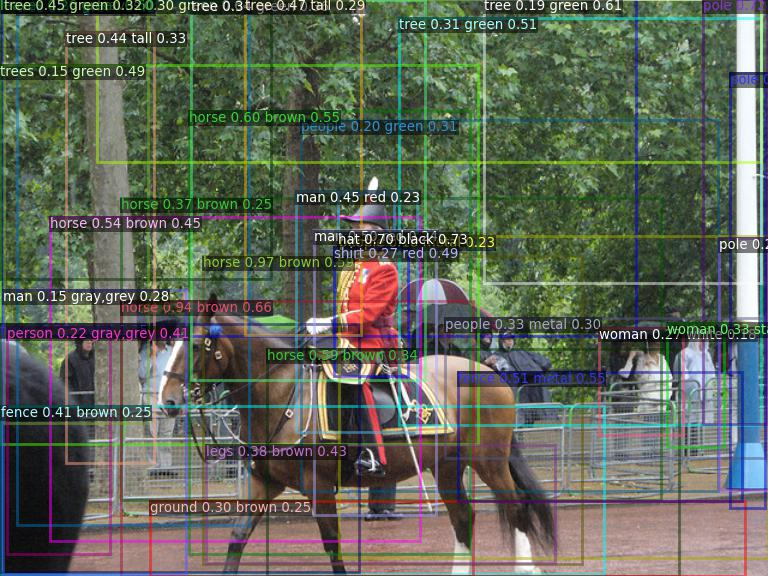

In [14]:
# for visualizing output
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

#image viz
frcnn_visualizer = SingleImageViz(URL, id2obj=objids, id2attr=attrids)

frcnn_visualizer.draw_boxes(
    output_dict.get("boxes"),
    output_dict.pop("obj_ids"),
    output_dict.pop("obj_probs"),
    output_dict.pop("attr_ids"),
    output_dict.pop("attr_probs"),
)
showarray(frcnn_visualizer._get_buffer())

In [15]:
#Very important that the boxes are normalized
normalized_boxes = output_dict.get("normalized_boxes")
features = output_dict.get("roi_features")

In [16]:
lxmert_tokenizer = LxmertTokenizer.from_pretrained("unc-nlp/lxmert-base-uncased")

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/153 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [17]:
#예제코드
test_question = ["what is the man riding?"]

inputs = lxmert_tokenizer(
    test_question,
    padding="max_length",
    max_length=20,
    truncation=True,
    return_token_type_ids=True,
    return_attention_mask=True,
    add_special_tokens=True,
    return_tensors="pt"
)

In [18]:
print(inputs.input_ids)
print(inputs.attention_mask)

tensor([[ 101, 2054, 2003, 1996, 2158, 5559, 1029,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [19]:
lxmert_vqa = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-vqa-uncased")

Downloading:   0%|          | 0.00/880 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/856M [00:00<?, ?B/s]

In [20]:
output_vqa = lxmert_vqa(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    visual_feats=features,
    visual_pos=normalized_boxes,
    token_type_ids=inputs.token_type_ids,
    output_attentions=False,
)

output_vqa

LxmertForQuestionAnsweringOutput(loss=None, question_answering_score=tensor([[-4.8003, -2.0933, -5.0623,  ..., -3.4784,  0.5502, -0.9368]],
       grad_fn=<AddmmBackward>), language_hidden_states=None, vision_hidden_states=None, language_attentions=None, vision_attentions=None, cross_encoder_attentions=None)

In [21]:
len(output_vqa["question_answering_score"][0])

3129

In [22]:
# get prediction
pred_vqa = output_vqa["question_answering_score"].argmax(-1)

pred_vqa

tensor([315])

In [23]:
vqa_answers[315]

'horse'

In [24]:
print("Question:", test_question)
print("prediction from LXMERT VQA:", vqa_answers[pred_vqa])

Question: ['what is the man riding?']
prediction from LXMERT VQA: horse


# VQA Inference

In [25]:
test_questions_for_url1 = [
    "Where is this scene?",
    "what is the man riding?",
    "What is the man wearing?",
    "What is the color of the horse?"
]

for test_question in test_questions_for_url1:
    # run lxmert
    test_question = [test_question]

    inputs = lxmert_tokenizer(
        test_question,
        padding="max_length",
        max_length=20,
        truncation=True,
        return_token_type_ids=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors="pt"
    )

    # run lxmert(s)
    output_vqa = lxmert_vqa(
        input_ids=inputs.input_ids,
        attention_mask=inputs.attention_mask,
        visual_feats=features,
        visual_pos=normalized_boxes,
        token_type_ids=inputs.token_type_ids,
        output_attentions=False,
    )
    # get prediction
    pred_vqa = output_vqa["question_answering_score"].argmax(-1)
    print("Question:", test_question)
    print("prediction from LXMERT VQA:", vqa_answers[pred_vqa])

Question: ['Where is this scene?']
prediction from LXMERT VQA: outdoors
Question: ['what is the man riding?']
prediction from LXMERT VQA: horse
Question: ['What is the man wearing?']
prediction from LXMERT VQA: suit
Question: ['What is the color of the horse?']
prediction from LXMERT VQA: brown


# STEP 1. 다른 이미지 테스트해 보기

In [27]:
# project_URL = "https://vqa.cloudcv.org/media/test2014/COCO_test2014_000000262567.jpg"

# test_questions_for_url2 = [
#     "Where is the cat?",
#     "What is near the disk?",
#     "What is the color of the table?",
#     "What is the color of the cat?",
#     "What is the shape of the monitor?",
#     "What is the color of the keyboard?",
# ]

In [32]:
URL_1 = "https://vqa.cloudcv.org/media/test2014/COCO_test2014_000000262567.jpg"

frcnn_cfg_1 = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")
image_preprocess_1 = Preprocess(frcnn_cfg_1)

project_images, project_sizes, project_scales_yx = image_preprocess(URL_1)

loading configuration file cache


In [33]:
print(project_images)
print(project_sizes)

tensor([[[[  61.0199,   61.2689,   62.1015,  ...,   50.5607,   50.1444,
             50.0199],
          [  60.8955,   61.1445,   61.9771,  ...,   50.8094,   50.3931,
             50.2686],
          [  60.4793,   60.7282,   61.5609,  ...,   51.6420,   51.2256,
             51.1012],
          ...,
          [ -87.9801,  -88.0373,  -88.2285,  ...,   21.7716,   21.5466,
             21.4793],
          [ -87.9801,  -88.0891,  -88.4536,  ...,   21.9628,   21.9110,
             21.8955],
          [ -87.9801,  -88.1046,  -88.5209,  ...,   22.0199,   22.0199,
             22.0199]],

         [[  48.0535,   48.4269,   49.6759,  ...,   41.5943,   41.1780,
             41.0535],
          [  47.9291,   48.2871,   49.4843,  ...,   41.5943,   41.1780,
             41.0535],
          [  47.5129,   47.8190,   48.8429,  ...,   41.5943,   41.1780,
             41.0535],
          ...,
          [ -99.9465,  -99.9364,  -99.9026,  ...,   13.8052,   13.5802,
             13.5129],
          [ -99.94

In [34]:
test_questions_for_url2 = [
    "Where is the cat?",
    "What is near the disk?",
    "What is the color of the table?",
    "What is the color of the cat?",
    "What is the shape of the monitor?",
    "What is the color of the keyboard?",
]

In [35]:
frcnn_cfg_1 = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")

frcnn_1 = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg_1)

loading configuration file cache
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /home/aiffel-dj54/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


In [60]:
frcnn_cfg_1.max_detections  # object detection 모델이 검출할 최대 object 개수

36

In [61]:
output_dict_1= frcnn(
    images, 
    sizes, 
    scales_yx=scales_yx, 
    padding="max_detections",
    max_detections=frcnn_cfg_1.max_detections,
    return_tensors="pt"
)

In [62]:
print(output_dict_1.get("boxes"))
print('-------------')
print(output_dict_1.get("boxes").shape)

tensor([[[1.0372e+02, 1.3613e+02, 2.2735e+02, 1.6974e+02],
         [8.4005e+01, 1.1941e+02, 2.4814e+02, 1.7585e+02],
         [0.0000e+00, 8.1354e+01, 3.2642e+02, 2.6568e+02],
         [3.8475e+02, 3.7221e+01, 4.9974e+02, 3.3300e+02],
         [2.9875e+01, 0.0000e+00, 4.3054e+02, 1.3465e+02],
         [1.5929e+02, 9.1682e+01, 3.7275e+02, 2.4955e+02],
         [6.7672e-01, 2.4750e+02, 2.7701e+02, 3.3300e+02],
         [1.6578e+02, 1.2526e+02, 3.4723e+02, 2.1946e+02],
         [0.0000e+00, 7.1275e+01, 2.1836e+02, 3.0790e+02],
         [5.2669e+01, 1.7062e+00, 2.6646e+02, 1.8314e+02],
         [6.1805e+01, 2.4761e+02, 4.2838e+02, 3.3299e+02],
         [1.2076e+01, 1.1892e+02, 3.6657e+02, 3.0462e+02],
         [1.9641e+02, 1.0624e+02, 3.5971e+02, 1.9710e+02],
         [9.1356e+01, 1.1064e+02, 4.1889e+02, 2.8040e+02],
         [1.2139e+02, 1.0626e+01, 4.8306e+02, 1.6577e+02],
         [3.0271e+02, 1.0307e+02, 3.2805e+02, 1.2879e+02],
         [2.9658e+02, 5.5949e+00, 4.9991e+02, 2.7482e+02

In [63]:
print(output_dict_1.get("roi_features"))
print('-------------')
print(output_dict_1.get("roi_features").shape)

tensor([[[2.4822e-03, 2.3580e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 3.3088e+00],
         [2.6639e-01, 1.0124e+00, 0.0000e+00,  ..., 9.0339e-04,
          1.5285e-02, 3.0090e+00],
         [6.0975e-01, 0.0000e+00, 0.0000e+00,  ..., 1.0956e-01,
          2.5223e-01, 1.7357e+00],
         ...,
         [7.9118e-01, 2.3213e-01, 0.0000e+00,  ..., 2.2883e-02,
          7.2807e-03, 6.4609e-01],
         [0.0000e+00, 1.4173e+00, 0.0000e+00,  ..., 0.0000e+00,
          2.0937e+00, 1.9630e+00],
         [1.0801e+00, 8.3446e-01, 0.0000e+00,  ..., 1.2504e-02,
          3.0912e-01, 6.6703e-01]]])
-------------
torch.Size([1, 36, 2048])


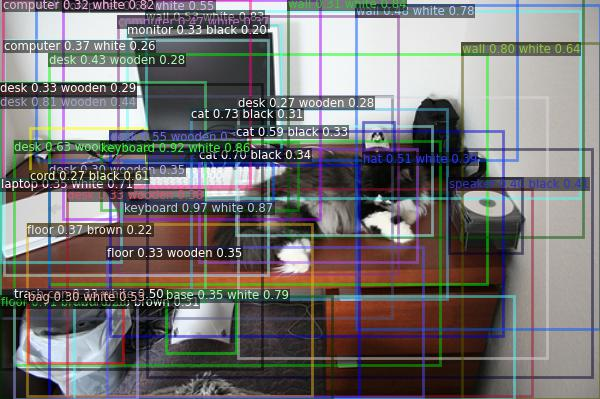

In [64]:
# for visualizing output
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

#image viz
frcnn_visualizer = SingleImageViz(URL, id2obj=objids, id2attr=attrids)

frcnn_visualizer.draw_boxes(
    output_dict_1.get("boxes"),
    output_dict_1.pop("obj_ids"),
    output_dict_1.pop("obj_probs"),
    output_dict_1.pop("attr_ids"),
    output_dict_1.pop("attr_probs"),
)
showarray(frcnn_visualizer._get_buffer())

In [43]:
#Very important that the boxes are normalized
normalized_boxes_1 = output_dict_1.get("normalized_boxes")
features_1 = output_dict_1.get("roi_features")

In [44]:
lxmert_tokenizer_1 = LxmertTokenizer.from_pretrained("unc-nlp/lxmert-base-uncased")


In [45]:
test_question_1 = ["what is the man riding?"]

inputs_1 = lxmert_tokenizer(
    test_question_1,
    padding="max_length",
    max_length=20,
    truncation=True,
    return_token_type_ids=True,
    return_attention_mask=True,
    add_special_tokens=True,
    return_tensors="pt"
)

In [46]:
print(inputs.input_ids)
print(inputs.attention_mask)

tensor([[ 101, 2054, 2003, 1996, 3609, 1997, 1996, 3586, 1029,  102,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [47]:
lxmert_vqa = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-vqa-uncased")

In [48]:
output_vqa_1 = lxmert_vqa(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    visual_feats=features,
    visual_pos=normalized_boxes,
    token_type_ids=inputs.token_type_ids,
    output_attentions=False,
)

output_vqa_1

LxmertForQuestionAnsweringOutput(loss=None, question_answering_score=tensor([[-3.5425, -2.2484, -1.1025,  ..., -1.5935,  1.3149, -0.0880]],
       grad_fn=<AddmmBackward>), language_hidden_states=None, vision_hidden_states=None, language_attentions=None, vision_attentions=None, cross_encoder_attentions=None)

In [49]:
len(output_vqa_1["question_answering_score"][0])

3129

In [50]:
# get prediction
pred_vqa_1 = output_vqa_1["question_answering_score"].argmax(-1)

pred_vqa_1

tensor([2594])

In [51]:
vqa_answers[2594]

'brown'

In [53]:
print("Question:", test_question)
print("prediction from LXMERT VQA:", vqa_answers[pred_vqa_1])

Question: ['What is the color of the horse?']
prediction from LXMERT VQA: brown


# GQA 성능검증_1

In [54]:
GQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/gqa/trainval_label2ans.json"

lxmert_gqa = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-gqa-uncased")

Downloading:   0%|          | 0.00/880 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/848M [00:00<?, ?B/s]

# STEP 3. 내가 선택한 이미지로 VQA/GQA 버전 비교해 보기

In [73]:
URL_2 = '/home/aiffel-dj54/aiffel/aiffel_exp_data/search.pstatic.net.jpeg'

frcnn_cfg_2 = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")
image_preprocess_2 = Preprocess(frcnn_cfg_2)

project_images_2, project_sizes_2, project_scales_yx_2 = image_preprocess_2(URL_2)

loading configuration file cache


In [75]:
print(project_images_2)
print(project_sizes_2)

tensor([[[[ 7.2020e+01,  7.2020e+01,  7.2020e+01,  ...,  8.1995e+01,
            8.1405e+01,  8.1020e+01],
          [ 7.1635e+01,  7.1635e+01,  7.1635e+01,  ...,  8.2380e+01,
            8.1790e+01,  8.1405e+01],
          [ 7.1045e+01,  7.1045e+01,  7.1045e+01,  ...,  8.2970e+01,
            8.2380e+01,  8.1995e+01],
          ...,
          [ 1.2567e+02,  1.2828e+02,  1.3230e+02,  ...,  5.6920e+01,
            5.6330e+01,  5.5945e+01],
          [ 1.4101e+02,  1.4181e+02,  1.4304e+02,  ...,  5.5150e+01,
            5.4560e+01,  5.4175e+01],
          [ 1.5102e+02,  1.5063e+02,  1.5004e+02,  ...,  5.3995e+01,
            5.3405e+01,  5.3020e+01]],

         [[ 1.2053e+01,  1.2053e+01,  1.2053e+01,  ...,  3.7029e+01,
            3.6439e+01,  3.6053e+01],
          [ 1.1668e+01,  1.1668e+01,  1.1668e+01,  ...,  3.7414e+01,
            3.6824e+01,  3.6439e+01],
          [ 1.1078e+01,  1.1078e+01,  1.1078e+01,  ...,  3.8004e+01,
            3.7414e+01,  3.7029e+01],
          ...,
     

In [105]:
test_questions_for_url3 = [
    "Is this man?",
    "Where is flower?",
    "How many folwers is there?",
    "What is the color of the flowers?",
    "What is the shape of the floswer?"
]

In [106]:
frcnn_cfg_2 = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")

frcnn_2 = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg_2)

loading configuration file cache
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /home/aiffel-dj54/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


In [107]:
frcnn_cfg_2.max_detections  # object detection 모델이 검출할 최대 object 개수

36

In [108]:
output_dict_2= frcnn_2(
    images, 
    sizes, 
    scales_yx=scales_yx, 
    padding="max_detections",
    max_detections=frcnn_cfg_2.max_detections,
    return_tensors="pt"
)

In [109]:
print(output_dict_2.get("boxes"))
print('-------------')
print(output_dict_2.get("boxes").shape)

tensor([[[1.0372e+02, 1.3613e+02, 2.2735e+02, 1.6974e+02],
         [8.4005e+01, 1.1941e+02, 2.4814e+02, 1.7585e+02],
         [0.0000e+00, 8.1354e+01, 3.2642e+02, 2.6568e+02],
         [3.8475e+02, 3.7221e+01, 4.9974e+02, 3.3300e+02],
         [2.9875e+01, 0.0000e+00, 4.3054e+02, 1.3465e+02],
         [1.5929e+02, 9.1682e+01, 3.7275e+02, 2.4955e+02],
         [6.7672e-01, 2.4750e+02, 2.7701e+02, 3.3300e+02],
         [1.6578e+02, 1.2526e+02, 3.4723e+02, 2.1946e+02],
         [0.0000e+00, 7.1275e+01, 2.1836e+02, 3.0790e+02],
         [5.2669e+01, 1.7062e+00, 2.6646e+02, 1.8314e+02],
         [6.1805e+01, 2.4761e+02, 4.2838e+02, 3.3299e+02],
         [1.2076e+01, 1.1892e+02, 3.6657e+02, 3.0462e+02],
         [1.9641e+02, 1.0624e+02, 3.5971e+02, 1.9710e+02],
         [9.1356e+01, 1.1064e+02, 4.1889e+02, 2.8040e+02],
         [1.2139e+02, 1.0626e+01, 4.8306e+02, 1.6577e+02],
         [3.0271e+02, 1.0307e+02, 3.2805e+02, 1.2879e+02],
         [2.9658e+02, 5.5949e+00, 4.9991e+02, 2.7482e+02

In [110]:
print(output_dict_2.get("roi_features"))
print('-------------')
print(output_dict_2.get("roi_features").shape)

tensor([[[2.4822e-03, 2.3580e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 3.3088e+00],
         [2.6639e-01, 1.0124e+00, 0.0000e+00,  ..., 9.0339e-04,
          1.5285e-02, 3.0090e+00],
         [6.0975e-01, 0.0000e+00, 0.0000e+00,  ..., 1.0956e-01,
          2.5223e-01, 1.7357e+00],
         ...,
         [7.9118e-01, 2.3213e-01, 0.0000e+00,  ..., 2.2883e-02,
          7.2807e-03, 6.4609e-01],
         [0.0000e+00, 1.4173e+00, 0.0000e+00,  ..., 0.0000e+00,
          2.0937e+00, 1.9630e+00],
         [1.0801e+00, 8.3446e-01, 0.0000e+00,  ..., 1.2504e-02,
          3.0912e-01, 6.6703e-01]]])
-------------
torch.Size([1, 36, 2048])


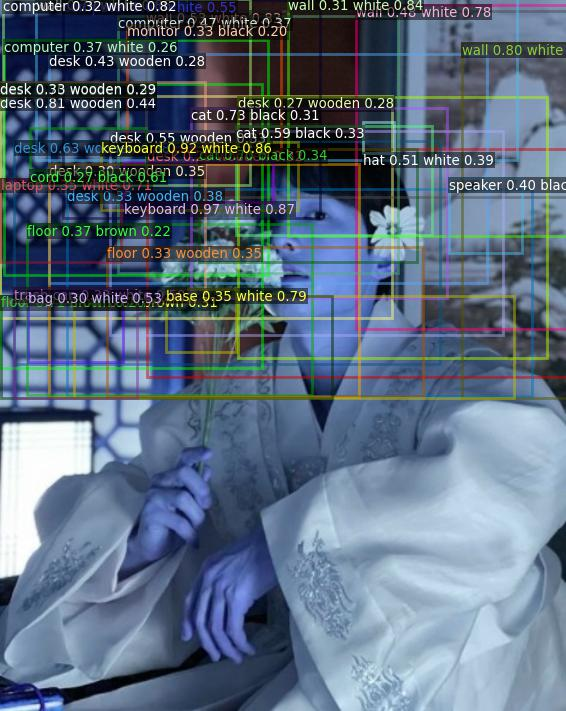

In [112]:
# for visualizing output
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

#image viz
frcnn_visualizer = SingleImageViz(URL_2, id2obj=objids, id2attr=attrids)

frcnn_visualizer.draw_boxes(
    output_dict_2.get("boxes"),
    output_dict_2.pop("obj_ids"),
    output_dict_2.pop("obj_probs"),
    output_dict_2.pop("attr_ids"),
    output_dict_2.pop("attr_probs"),
)
showarray(frcnn_visualizer._get_buffer())

In [113]:
#Very important that the boxes are normalized
normalized_boxes_2 = output_dict_2.get("normalized_boxes")
features_2 = output_dict_2.get("roi_features")

In [114]:
lxmert_tokenizer_2 = LxmertTokenizer.from_pretrained("unc-nlp/lxmert-base-uncased")

In [115]:
test_question_3 = ["what is the man wearing?"]

inputs_2 = lxmert_tokenizer(
    test_question_2,
    padding="max_length",
    max_length=20,
    truncation=True,
    return_token_type_ids=True,
    return_attention_mask=True,
    add_special_tokens=True,
    return_tensors="pt"
)

In [116]:
print(inputs_2.input_ids)
print(inputs_2.attention_mask)

tensor([[ 101, 2054, 2003, 1996, 2158, 4147, 1029,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [117]:
lxmert_vqa_2 = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-vqa-uncased")

In [118]:
output_vqa_2 = lxmert_vqa_2(
    input_ids=inputs_2.input_ids,
    attention_mask=inputs_2.attention_mask,
    visual_feats=features,
    visual_pos=normalized_boxes,
    token_type_ids=inputs_2.token_type_ids,
    output_attentions=False,
)

output_vqa_2

LxmertForQuestionAnsweringOutput(loss=None, question_answering_score=tensor([[-0.4783, -0.9808, -0.8831,  ...,  1.4093,  2.0836,  1.5332]],
       grad_fn=<AddmmBackward>), language_hidden_states=None, vision_hidden_states=None, language_attentions=None, vision_attentions=None, cross_encoder_attentions=None)

In [119]:
len(output_vqa_2["question_answering_score"][0])

3129

In [120]:
# get prediction
pred_vqa_2 = output_vqa_1["question_answering_score"].argmax(-1)

pred_vqa_2

tensor([2594])

In [121]:
vqa_answers[2594]

'brown'

In [122]:
print("Question:", test_question_3)
print("prediction from LXMERT VQA:", vqa_answers[pred_vqa_2])

Question: ['what is the man wearing?']
prediction from LXMERT VQA: brown


In [123]:
# vqa
test_questions_for_url3 = [
    "Is this man?",
    "Where is flower?",
    "How many folwers is there?",
    "What is the color of the flowers?",
    "What is the shape of the floswer?"
]
for test_question in test_questions_for_url3:
    # run lxmert
    test_question = [test_question]

    inputs = lxmert_tokenizer_2(
        test_question,
        padding="max_length",
        max_length=20,
        truncation=True,
        return_token_type_ids=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors="pt"
    )

    # run lxmert(s)
    output_vqa_2 = lxmert_vqa_2(
        input_ids=inputs.input_ids,
        attention_mask=inputs.attention_mask,
        visual_feats=features,
        visual_pos=normalized_boxes,
        token_type_ids=inputs.token_type_ids,
        output_attentions=False,
    )
    # get prediction
    pred_vqa_2 = output_vqa_2["question_answering_score"].argmax(-1)
    print("Question:", test_question)
    print("prediction from LXMERT VQA:", vqa_answers[pred_vqa_2])

Question: ['Is this man?']
prediction from LXMERT VQA: yes
Question: ['Where is flower?']
prediction from LXMERT VQA: on horse
Question: ['How many folwers is there?']
prediction from LXMERT VQA: 1
Question: ['What is the color of the flowers?']
prediction from LXMERT VQA: green
Question: ['What is the shape of the floswer?']
prediction from LXMERT VQA: rectangle


In [124]:
#gqa evaluation
GQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/gqa/trainval_label2ans.json"

lxmert_gqa = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-gqa-uncased")

1. LXMERT 모델을 활용해 새로운 이미지에 대한 VQA 작업을 진행하였다.
	이미지 bounding box 시각화 및 question에 대한 answer 출력이 정상적으로 진행되었다.

2. GQA 버전의 LXMERT 모델을 활용해 VQA 작업을 진행하였다.
	GQA 버전 모델을 활용하여 question에 대한 answer 출력이 정상적으로 진행되었다.

3. VQA, GQA 버전의 성능을 체계적으로 비교분석하였다.
	자신이 선택한 다양한 이미지에 대해 두 모델의 답안이 어떻게 달라지는지 비교분석 결과를 제출하였다.